In [1]:
from occultence import *
from nuance import Nuance, utils

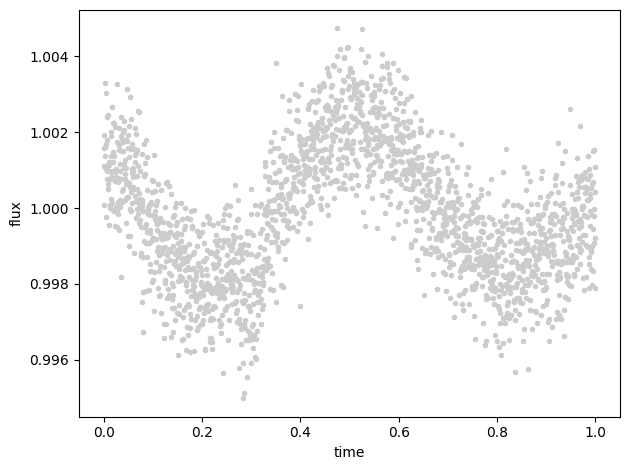

In [2]:
t = np.linspace(0, 1, 2000)
true = {"t0": 0.3, "D": 0.05, "P": 10, "depth": 1e-3}
(time, flux, error), X, gp = utils.simulated(t=t, **true)
plt.plot(time, flux, ".", c="0.8")
plt.ylabel("flux")
plt.xlabel("time")

plt.tight_layout()

In [5]:
from nuance.kernels import rotation

nu = Nuance(time, flux, error=error, X=X)
build_gp, init_params = rotation(period=0.6, error=error)
opt, mu, nll = nu.gp_optimization(build_gp=build_gp,)

opt_params = opt(init_params=init_params)
rot_kernel = build_gp(params=opt_params, time=time)

ScipyMinimizeInfo(fun_val=Array(-10927.2762999, dtype=float64, weak_type=True), success=True, status=0, iter_num=84, hess_inv=Array([[ 7.50046219e+09, -1.94780341e+09, -3.30565839e+09,
         7.41660439e+01,  4.78672399e+02,  1.46137754e+01,
        -3.75790157e+09, -1.72611439e+09,  3.75023194e+09],
       [-1.94780330e+09,  5.05827219e+08,  8.58450074e+08,
        -1.92625511e+01, -1.24274647e+02, -3.81310552e+00,
         9.75893605e+08,  4.48256552e+08, -9.73901872e+08],
       [-3.30565856e+09,  8.58450170e+08,  1.45689395e+09,
        -3.26919315e+01, -2.10901061e+02, -6.46850865e+00,
         1.65620987e+09,  7.60745764e+08, -1.65282966e+09],
       [ 7.41473122e+01, -1.92576879e+01, -3.26836748e+01,
         2.75528381e-04, -2.65714163e-04,  4.32701836e-05,
        -3.71665104e+01, -1.70718457e+01,  3.70741281e+01],
       [ 4.78881989e+02, -1.24329078e+02, -2.10993420e+02,
        -2.65710302e-04,  2.99521000e-02, -2.08045423e-03,
        -2.39958626e+02, -1.10220185e+02,  2

In [6]:
rot_kernel

In [7]:
nu = Nuance(time, flux, gp=rot_kernel, X=X)

eopchs = time.copy()
durations = np.linspace(0.01, 0.2, 15)
nu.linear_search(eopchs, durations)

  0%|          | 0/200 [00:00<?, ?it/s]

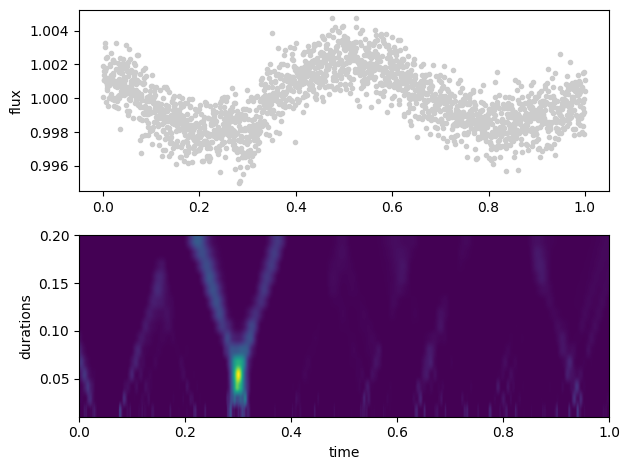

In [8]:
plt.subplot(211)
plt.plot(time, flux, ".", c="0.8")
plt.ylabel("flux")

plt.subplot(212)
nu.search_data.show_ll()
plt.ylabel("durations")
plt.xlabel("time")

plt.tight_layout()

In [63]:
nu.search_data

SearchData(t0s=array([0.00000000e+00, 5.00250125e-04, 1.00050025e-03, ...,
       9.98999500e-01, 9.99499750e-01, 1.00000000e+00]), Ds=array([0.01      , 0.02357143, 0.03714286, 0.05071429, 0.06428571,
       0.07785714, 0.09142857, 0.105     , 0.11857143, 0.13214286,
       0.14571429, 0.15928571, 0.17285714, 0.18642857, 0.2       ]), ll=array([[10927.2762999 , 10927.27893186, 10927.41808002, ...,
        10927.2762999 , 10927.2762999 , 10927.2762999 ],
       [10927.2762999 , 10927.29917603, 10927.412054  , ...,
        10927.2762999 , 10927.2762999 , 10927.2762999 ],
       [10927.2762999 , 10927.33571336, 10927.40620308, ...,
        10927.2762999 , 10927.2762999 , 10927.2762999 ],
       ...,
       [10927.2762999 , 10927.44018444, 10927.2764475 , ...,
        10927.59289395, 10927.6062972 , 10927.64419606],
       [10927.2762999 , 10927.42425223, 10927.27904122, ...,
        10927.59675609, 10927.6045425 , 10927.64403858],
       [10927.2762999 , 10927.42015069, 10927.28549333, .

epoch: 0.301
duration: 0.051


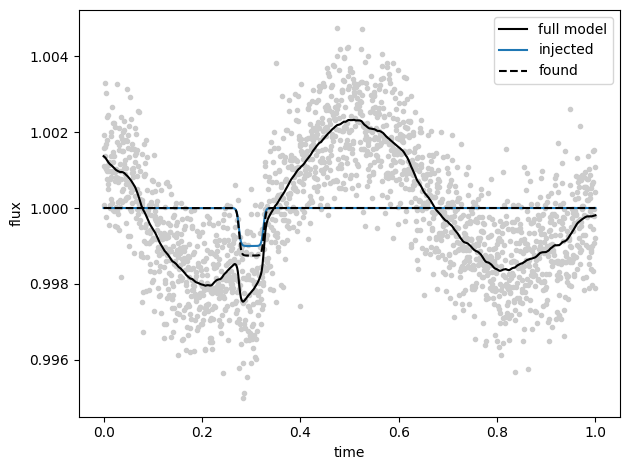

In [64]:
i, j = np.unravel_index(np.argmax(nu.search_data.ll), nu.search_data.ll.shape)
t0, D = nu.search_data.t0s[i], nu.search_data.Ds[j]
linear, astro, noise = nu.models(t0, D)
plt.plot(time, flux, ".", c="0.8")
plt.plot(time, linear + astro + noise, c="k", label="full model")
plt.plot(
    time,
    true["depth"] * utils.periodic_transit(t, D=true["D"], t0=true["t0"]) + 1.0,
    ls="-",
    c="C0",
    label="injected",
)
plt.plot(time, astro + 1.0, ls="--", c="k", label="found")
plt.legend()
plt.ylabel("flux")
plt.xlabel("time")

plt.tight_layout()
print("\n".join([f"{n}: {v:.3f}" for n, v in zip(["epoch", "duration"], [t0, D])]))